In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import nxviz as nv
import matplotlib.pyplot as plt
from networkx.algorithms.approximation import clique

In [2]:
data = pd.read_csv('/Users/eugenia/vk_data.csv')

In [3]:
data.head(3)

,Unnamed: 0,from_id,id,text,date,likes,reply_to_user
0,0,100,12925517,Comment deleted by user or page manager,2020-02-18 01:57:50,0,NaN
1,1,119181388,12925518,"Мы ничего нового из его фильма не узнали, гово...",2020-02-18 01:57:50,825,NaN
2,2,231731432,12925521,"да я не заразен, отВИЧаю!",2020-02-18 01:57:58,990,NaN


In [4]:
data = data.dropna()

In [5]:
G=nx.Graph()

G.add_nodes_from(data['from_id'])

In [6]:
edges = list(zip(data['from_id'].astype(int), data['reply_to_user'].astype(int)))

G.add_edges_from(edges)

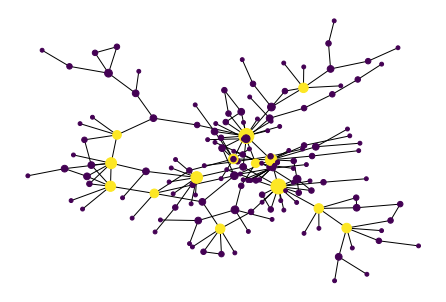

In [9]:
nodes = G.nodes()
node_colours = []
for node in nodes:
    if G.degree(node) >= 5:
        node_colours.append(2)
    else:
        node_colours.append(1)
d = dict(G.degree)

pos=nx.kamada_kawai_layout(G)
plt.figure(2)
nx.draw(G,pos,node_color=node_colours, node_size=[v *15 for v in d.values()])
#plt.savefig("full_graph_vk.png")

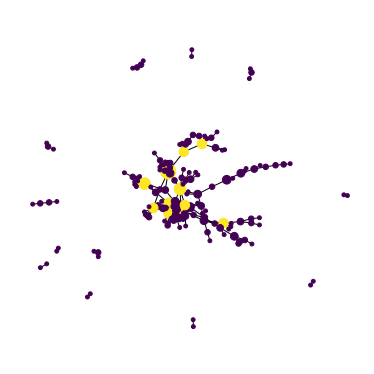

In [163]:

plt.figure(3,figsize=(5,5)) 
nx.draw(G,pos,node_color=node_colours, node_size=[v *15 for v in d.values()])
plt.show()
#plt.savefig("full_graph_vk.png")

In [14]:
L = sorted(G.degree, key=lambda x: x[1], reverse=True)

In [11]:
ids =[]
for i in L:
    ids.append(i[0])